In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [38]:
# set the dimensions
N = 100
D = 2
K = 1

In [39]:
# set the initial weights
# W = np.random.randn(D,K)
# b = np.random.randn(K)
W = np.zeros((D,K))
b = np.zeros(K)

In [40]:
print(W.shape)
print(b.shape)
print(W)
print(b)

(2, 1)
(1,)
[[0.]
 [0.]]
[0.]


In [41]:
X, t = make_classification(n_samples=N, n_features=D, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [42]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [43]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

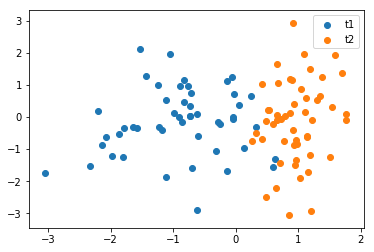

In [44]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.legend()
plt.show()

## Log reg

In [45]:
def Z(X, W, b):
#     return X.dot(W) + b
    return np.dot(X, W) + b

In [46]:
Z1 = Z(X, W, b)
Z1.shape

(100, 1)

In [47]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [48]:
y = sig(Z1)
y.shape

(100, 1)

In [49]:
def cost(t, y):
    return -t.reshape(N,-1)*np.log(y)-(1-t.reshape(N,-1))*(1-np.log(y))

In [50]:
cost1 = cost(t, y)
cost1.shape

(100, 1)

In [51]:
def error(cost):
    return cost.sum()

In [52]:
error1 = error(cost1)
error1

-47.61370563888012

In [53]:
error_list = []
acc_list = []
W0_list = []
W1_list = []
b_list = []
lr = 0.001
print('initial error: {}'.format(error1))

for e in range(15000):
    
    Z1 = Z(X, W, b)
    y = sig(Z1)
    cost1 = cost(t, y)
    error1 = error(cost1)
    
    dw = np.dot(X.T,(y - t.reshape(N,-1)))
    db = ((y - t.reshape(N,-1)).sum())/N
    
    W -= lr*dw
    b -= lr*db
    
    acc_list.append(((np.round(y.T))==t).sum())
    error_list.append(error1)
    W0_list.append(list(W[0]))
    W1_list.append(list(W[1]))
    b_list.append(list(b))
    
    if e % 100 == 0:
        print('error: {}'.format(error1))
        print('accuracy: {}'.format(((np.round(y.T))==t).sum()))

initial error: -47.61370563888012
error: -47.61370563888012
accuracy: 49
error: -137.29577651122946
accuracy: 94
error: -167.8656621178128
accuracy: 94
error: -186.44720515814248
accuracy: 94
error: -199.68355477175592
accuracy: 94
error: -209.8611133518849
accuracy: 94
error: -218.04989146836598
accuracy: 94
error: -224.840212769165
accuracy: 93
error: -230.5936205772634
accuracy: 92
error: -235.5482448529621
accuracy: 92
error: -239.86958118128814
accuracy: 92
error: -243.67749504132277
accuracy: 92
error: -247.0616917825795
accuracy: 92
error: -250.09111192192609
accuracy: 92
error: -252.8199128171935
accuracy: 92
error: -255.29142837504563
accuracy: 92
error: -257.5408776193257
accuracy: 92
error: -259.5972699970772
accuracy: 92
error: -261.4847784190762
accuracy: 92
error: -263.22374981660613
accuracy: 92
error: -264.8314628520341
accuracy: 93
error: -266.3227054877766
accuracy: 93
error: -267.71022177341007
accuracy: 93
error: -269.0050620714186
accuracy: 93
error: -270.216860896

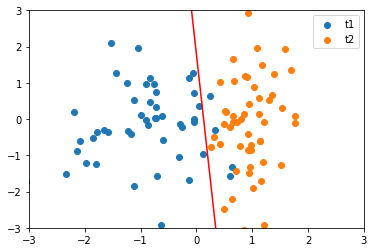

In [54]:
ex1 = np.linspace(-3, 3, 100)
ex2 = -(W[0]*ex1 + b)/W[1]

plt.axes(xlim=(-3,3), ylim=(-3,3))
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.plot(ex1, ex2, color='r')
plt.legend()
plt.show()

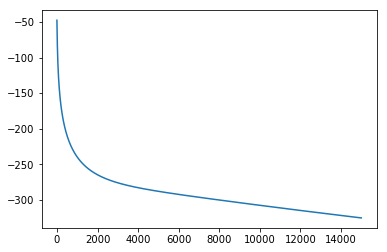

In [55]:
plt.plot(error_list)
plt.show()

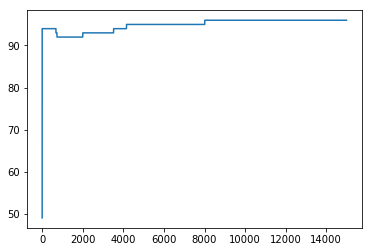

In [56]:
plt.plot(acc_list)
plt.show()

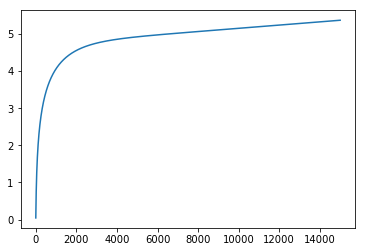

In [57]:
plt.plot(W0_list)
plt.show()

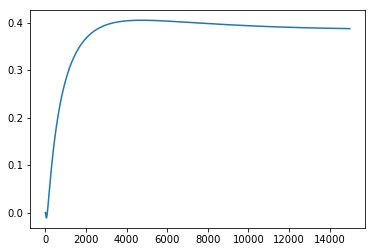

In [58]:
plt.plot(W1_list)
plt.show()

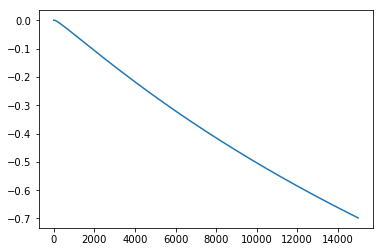

In [59]:
plt.plot(b_list)
plt.show()